# Recommender System


Recommendation System is a filtration program whose prime goal is to predict the “rating” or “preference” of a user towards a domain-specific item or item. 
In our case, this domain-specific item is a movie, therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

---

### Importing the Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

---

### Reading and Working with the Dataset

In [2]:
movies = pd.read_csv('/content/drive/MyDrive/Internship Stuff/Cantilever Labs/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Internship Stuff/Cantilever Labs/ratings.csv')

In [3]:
final_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')
final_dataset.fillna(0, inplace=True) # Replacing the NaN values with 0's
# OR # final_dataset = final_dataset.fillna(0)

In [4]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
nu = ratings.groupby('movieId')['userId'].agg('count') # Number of Users who Rated for each Movie
nu

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

Let's consider those Movies which are rated by atleast 10 Users

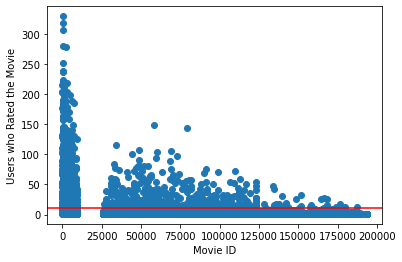

In [6]:
plt.scatter(nu.index, nu)
plt.xlabel('Movie ID')
plt.ylabel('Users who Rated the Movie')
plt.axhline(y=10, color='r')# Number of Movies which are rated by more than 10 Users

In [7]:
final_dataset = final_dataset.loc[nu[nu>10].index,:] # Number of Movies which are rated by more than 10 Users
final_dataset # Getting Movies (which are rated by more than 10 Users) for All Users

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
nm = ratings.groupby('userId')['movieId'].agg('count') # Number of Movies rated by each User
nm

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

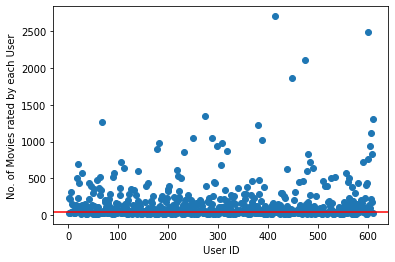

In [9]:
plt.scatter(nm.index, nm)
plt.xlabel('User ID')
plt.ylabel('No. of Movies rated by each User')
plt.axhline(y=50, color='r')# Removing the Users who have rated 50 or more Movies

In [10]:
final_dataset = final_dataset.loc[:,nm[nm>50].index]# Removing the Users who have rated 50 or more Movies
final_dataset # Getting Users (who rated more than 50 Movies) for All Movies

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we are going to compress the DataFrame for easier usage.

We are doing this, because the Non-Zero values are more than the Zero Values.

In [11]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
final_dataset

userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
movie_list = movies[movies['title'].str.contains('Iron Man')]
movie_list

,movieId,title,genres
6743,59315,Iron Man (2008),Action|Adventure|Sci-Fi
7324,77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
8142,102007,"Invincible Iron Man, The (2007)",Animation
8151,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX
9058,142056,Iron Man & Hulk: Heroes United (2013),Action|Adventure|Animation
9444,167296,Iron Man (1931),Drama


In [13]:
movie_index = movie_list.iloc[0]['movieId']
final_dataset[final_dataset['movieId']==movie_index]

userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
1821,59315,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


---

### Building and Working with the Model

In [14]:
knn = NearestNeighbors(metric='cosine', n_neighbors=20)
knn.fit(csr_data)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [15]:
index = final_dataset[final_dataset['movieId']==movie_index].index[0]
index

1821

In [16]:
similarities,indices = knn.kneighbors(csr_data[index], n_neighbors=11) # We want to Recommend 10 movies along with the index value
print(similarities)
print(indices)

[[2.22044605e-16 2.85319425e-01 2.85834801e-01 2.98137759e-01
  3.07491558e-01 3.10893262e-01 3.62758975e-01 3.66029405e-01
  3.68558318e-01 3.68757742e-01 3.68856912e-01]]
[[1821 1961 1816 1830 1907 1896 1650 1870 1835 2060 1873]]


The first element of 1st list will pair with first element of 2nd List, and so on, Then we sort the list.

In [17]:
recommendations = sorted(list(zip(indices.squeeze().tolist(),similarities.squeeze().tolist())),key=lambda x:x[1])[:0:-1]
recommendations

[(1873, 0.3688569117501048),
 (2060, 0.3687577424126396),
 (1835, 0.3685583176966156),
 (1870, 0.36602940514331395),
 (1650, 0.3627589745372938),
 (1896, 0.31089326180490995),
 (1907, 0.30749155823084806),
 (1830, 0.2981377590200208),
 (1816, 0.28583480118216587),
 (1961, 0.2853194248771902)]

In [18]:
l = []
for val in recommendations:
  movie_id = final_dataset.iloc[val[0]]['movieId']
  l.append(movies[movies['movieId']==movie_id]['title'].values[0])
pd.DataFrame(l)

,0
0,Up (2009)
1,Guardians of the Galaxy (2014)
2,Watchmen (2009)
3,Star Trek (2009)
4,Batman Begins (2005)
5,Avatar (2009)
6,Iron Man 2 (2010)
7,WALL·E (2008)
8,"Dark Knight, The (2008)"
9,"Avengers, The (2012)"
